# Exploratory Data Analysis

The next step after data wrangling is to perform exploratory data analysis (EDA) and inferential statistics on the data. In this step, I will  look at the visual plots to make hypotheses regarding the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set seaborn style
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import cleaned data
AAPL_Clean = pd.read_csv('/Users/meiliu/Documents/SpringBoard Related/AAPL_Clean.csv')
AAPL_Clean.drop('Unnamed: 0', axis=1, inplace=True)

# convert date to datetime and for convenience set it as the index
AAPL_Clean['date']=pd.to_datetime(AAPL_Clean['date'])
AAPL_Clean.set_index('date', inplace=True)

AAPL_Clean.head()

,DCLRDT,DIVAMT,PRC,VOL,OPENPRC,NUMTRD,sprtrn,dayofweek,month,year,HISPRD,SPRD,OCdiff,TREND,Announce,Surprise
date,,,,,,,,,,,,,,,,
2013-01-02,0,0.0,78.432861,147260365,79.117144,151041,0.025403,2,1,2013,0.024685,0.000018,0.008724,21,0.0,NaN
2013-01-03,0,0.0,77.442270,93079714,78.268571,95452,-0.002086,3,1,2013,0.016026,0.000313,0.010670,21,0.0,NaN
2013-01-04,0,0.0,75.285714,154612668,76.709290,151801,0.004865,4,1,2013,0.024345,0.000380,0.018909,21,0.0,NaN
2013-01-07,0,0.0,74.842860,126121317,74.571429,127922,-0.003123,0,1,2013,0.027368,0.000420,-0.003627,21,0.0,NaN
2013-01-08,0,0.0,75.044286,118417425,75.601431,113763,-0.003242,1,1,2013,0.020412,0.000457,0.007424,21,0.0,NaN


### 1. Stock Price and Return

#### 1.1 How does the stock price change over time?

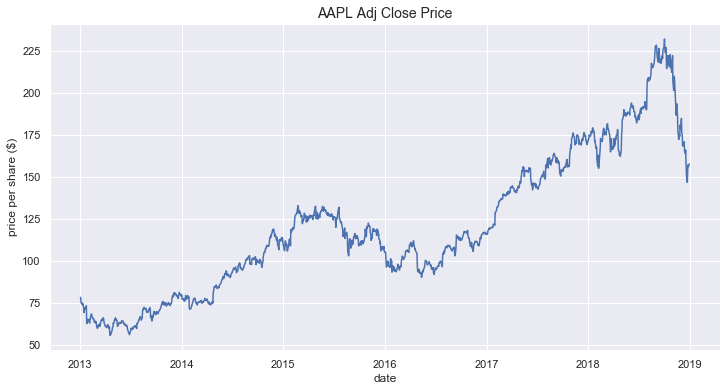

In [3]:
# plot the closing stock price
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['PRC'])
plt.xlabel('date')
plt.ylabel('price per share ($)')
plt.title('AAPL Adj Close Price', size=14);

The first thing to look at is the closing stock price (which is the prediction target) over time. The last 10 days of the sample period will be set as the test period. It will probably be difficult to capture the price drop at the end of 2018, since it appears to be only price movement within the 6 year period to have such a steep decline.  
This price drop is actually a response to Apple issuing lower-than-expected guidance as well as the apprehension about US-China trade relations. This information is not directly incorporated into any of the features in my model. Thus I expect that the test accuracy will be much lower than the validation accuracy. 

#### 1.2 Does the stock price or return differ based on the day of the week or the month of the year?

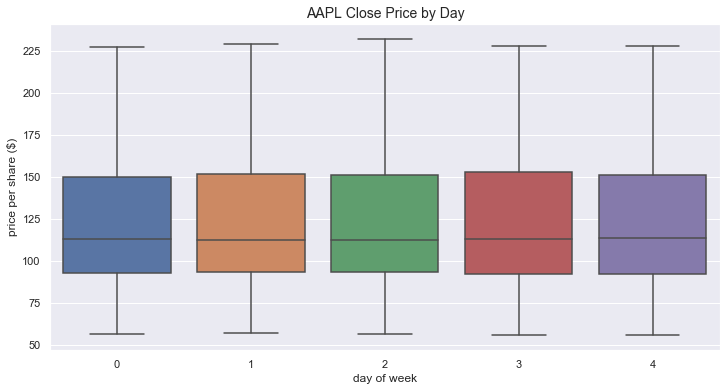

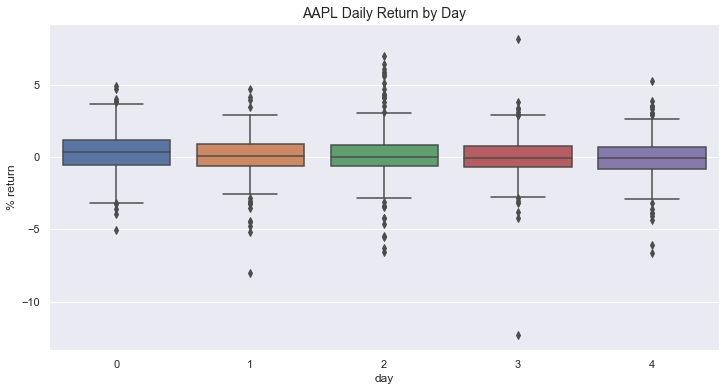

In [4]:
# create boxplot of price by the day of the week (0:Mon, ... 4:Fri)
plt.figure(figsize=(12,6))
sns.boxplot(AAPL_Clean['dayofweek'], AAPL_Clean['PRC'])
plt.xlabel('day of week')
plt.ylabel('price per share ($)')
plt.title('AAPL Close Price by Day', size=14)
plt.show()

# calculate the daily stock return (including dividends) using the adj closing price
AAPL_Clean['ret'] = (AAPL_Clean['PRC'].diff()+AAPL_Clean['DIVAMT'])/AAPL_Clean['PRC'].shift()*100

# create boxplot of return by day of the week
plt.figure(figsize=(12,6))
sns.boxplot(AAPL_Clean['dayofweek'], AAPL_Clean['ret'])
plt.xlabel('day')
plt.ylabel('% return')
plt.title('AAPL Daily Return by Day', size=14);

The day of the week does not appear to make much of a difference in the stock price. But in terms of stock returns, Mondays appear to have a slightly positive return while the rest of the weekdays appear to be centered around 0. Wednesdays seem have a wider spread of outliers.

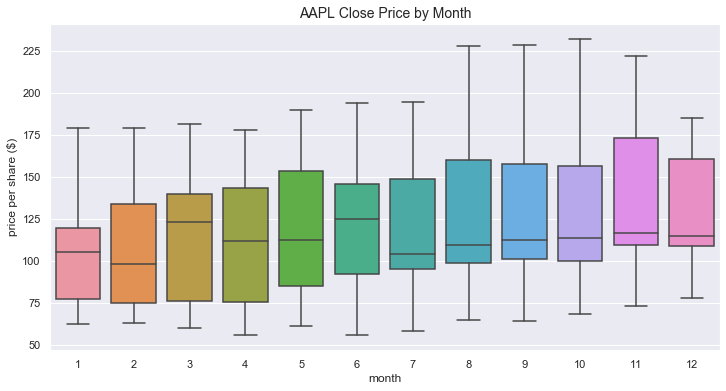

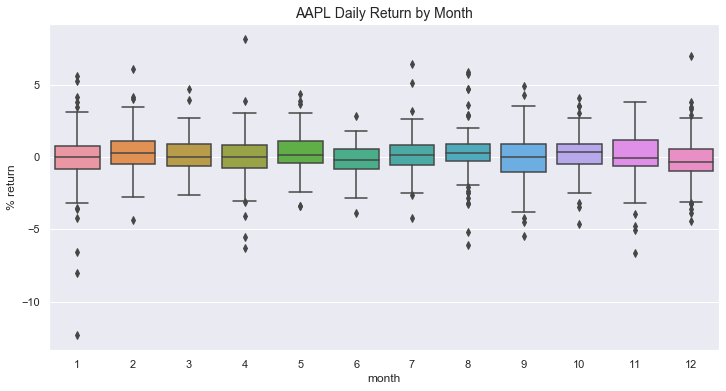

In [5]:
# create boxplot of price by month
plt.figure(figsize=(12,6))
sns.boxplot(AAPL_Clean['month'], AAPL_Clean['PRC'])
plt.xlabel('month')
plt.ylabel('price per share ($)')
plt.title('AAPL Close Price by Month', size=14)
plt.show()

# create boxplot of daily return by month
plt.figure(figsize=(12,6))
sns.boxplot(AAPL_Clean['month'], AAPL_Clean['ret'])
plt.xlabel('month')
plt.ylabel('% return')
plt.title('AAPL Daily Return by Month', size=14)
plt.show()

In the price by month boxplot, months 8-10 have the longest top whiskers, which reflects the price peak in late 2018. In the daily return by month boxplot, the median value for all months is around 0%. January has the largest negative return (<-10%). For all months, the whiskers on the boxplots are short, and large neg/pos returns are considered outliers.

#### 1.3 What does the distribution of historical returns look like?

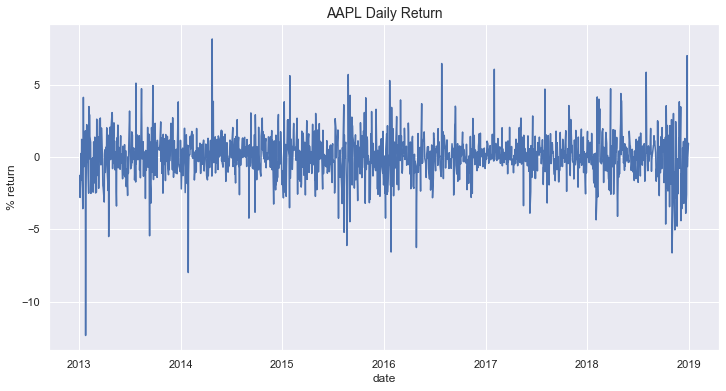

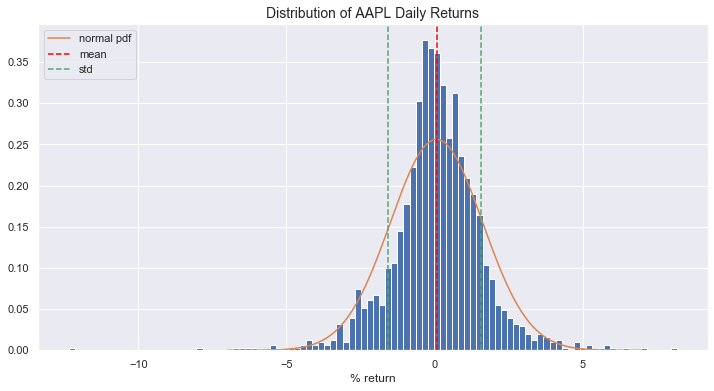

In [6]:
# plot the time series of AAPL returns
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['ret'])
plt.xlabel('date')
plt.ylabel('% return')
plt.title('AAPL Daily Return', size=14)
plt.show()

# calculate the mean & std of AAPL returns to use in histogram
mean = AAPL_Clean['ret'].mean()
std = AAPL_Clean['ret'].std()

# generate normal pdf to overlay on histogram
from scipy import stats
lnspc = np.linspace(-7, 7, len(AAPL_Clean['ret']))
pdf_g = stats.norm.pdf(lnspc, mean, std) 

# plot the histogram of AAPL returns
plt.figure(figsize=(12,6))
plt.hist(AAPL_Clean['ret'], bins=100, normed=True)
plt.plot(lnspc, pdf_g, label='normal pdf')
plt.axvline(mean,color='red',linestyle='dashed', label='mean')
plt.axvline(std,color='g',linestyle='dashed', label='std')
plt.axvline(-std,color='g',linestyle='dashed')
plt.xlabel('% return')
plt.title('Distribution of AAPL Daily Returns', size=14)
plt.legend(loc='upper left');

The histogram better summarizes the conclusions from the preceding boxplot. The daily stock returns appear to be somewhat normally distributed with positive kurtosis and centered around zero. This means that large price movements in either direction are rare. The range of values indicates that, historically, very large price decreases (<-10%) have occurred but not equally large price increases. This is true even after excluding 2018 data.

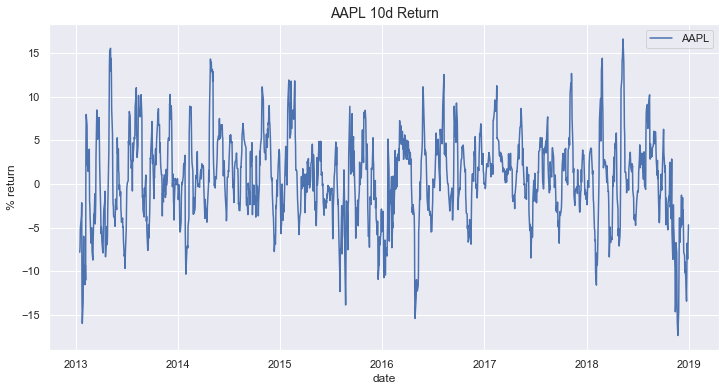

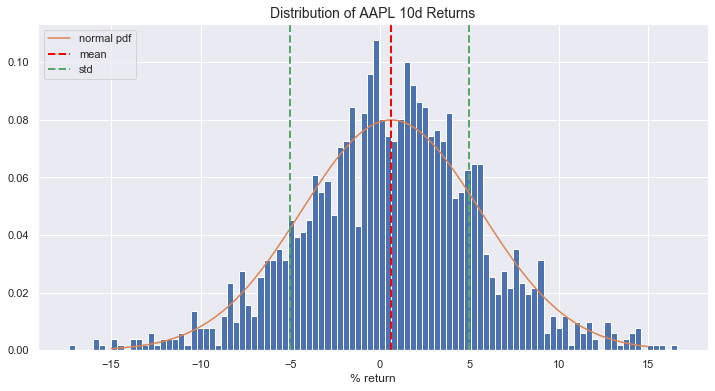

In [7]:
# calculate the 10 day AAPL returns
AAPL_Clean['AAPLret10'] = (AAPL_Clean['PRC'].diff(10)+AAPL_Clean['DIVAMT'])/AAPL_Clean['PRC'].shift(10)*100

# plot the time series of 10 day AAPL returns 
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['AAPLret10'], label='AAPL')
plt.xlabel('date')
plt.ylabel('% return')
plt.title('AAPL 10d Return', size=14)
plt.legend()
plt.show()

# calculate the mean and std to use in histogram
mean = AAPL_Clean['AAPLret10'].mean()
std = AAPL_Clean['AAPLret10'].std()

# generate normal pdf to overlay on histogram
lnspc = np.linspace(-15, 15, len(AAPL_Clean['ret']))
pdf_g = stats.norm.pdf(lnspc, mean, std) 

# plot the histogram of AAPL returns
plt.figure(figsize=(12,6))
plt.hist(AAPL_Clean['AAPLret10'], bins=100, normed=True)
plt.plot(lnspc, pdf_g, label="normal pdf")
plt.axvline(mean,color='red',linestyle='dashed',linewidth=2, label='mean')
plt.axvline(std,color='g',linestyle='dashed',linewidth=2, label='std')
plt.axvline(-std,color='g',linestyle='dashed',linewidth=2)
plt.xlabel('% return')
plt.title('Distribution of AAPL 10d Returns', size=14)
plt.legend(loc='upper left');

Since the model will predict the stock price over a 10 trading days period, I also plotted the histogram for 10-day returns. The mean value is small but positive, with the most common values being slightly above and below the mean. Unlike with daily returns, the range of values indicates that both large price decreases and large price increases have occured historically (abs value within 20%).

#### 1.4 Is there any relationship between AAPL returns and the S&P500 returns?

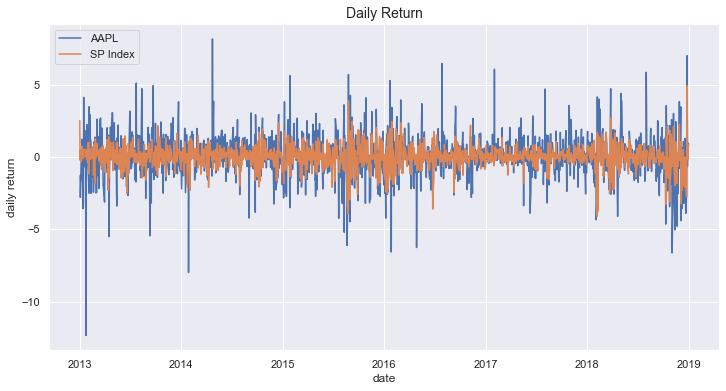

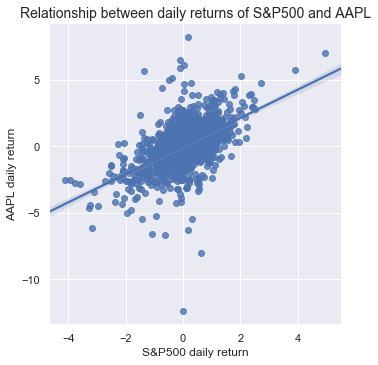

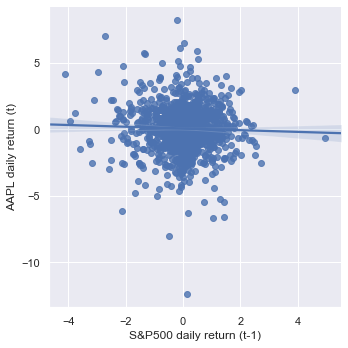

In [111]:
# convert S&P500 daily returns to percentage terms in order to compare them with AAPL returns
#AAPL_Clean['sprtrn'] = AAPL_Clean['sprtrn']*100

# plot the times series of S&P500 returns overlaid on AAPL returns
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['ret'], label='AAPL')
plt.plot(AAPL_Clean['sprtrn'], label='SP Index')
plt.xlabel('date')
plt.ylabel('daily return')
plt.title('Daily Return', size=14)
plt.legend()
plt.show()

# plot S&P500 daily returns against AAPL daily returns 
sns.lmplot(x='sprtrn', y='ret', data=AAPL_Clean)
plt.xlabel('S&P500 daily return')
plt.ylabel('AAPL daily return')
plt.title('Relationship between daily returns of S&P500 and AAPL', size=14)
plt. show()

# create a shifted AAPL return
# such that the shifted return is one trading period ahead of other values in the same row
AAPL_Clean['ret_shift'] = AAPL_Clean['ret'].shift(-1)

# plot S&P500 daily returns (t-1) against AAPL daily returns (t)
sns.lmplot(x='sprtrn', y='ret_shift', data=AAPL_Clean)
plt.xlabel('S&P500 daily return (t-1)')
plt.ylabel('AAPL daily return (t)')
plt. show();

The returns of the S&P 500 index appear to be highly correlated with AAPL's return. The two returns have a high degree of comovement, but the previous day's S&P 500 return has little effect on the next day's AAPL return. The comovement is likely a response to overall uncertainty or information in the market.

### 2. Stock Return Volatility

#### 2.1 How does stock volatility affect stock returns?

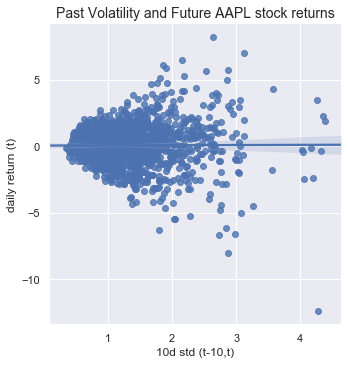

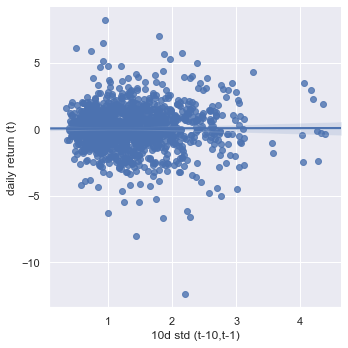

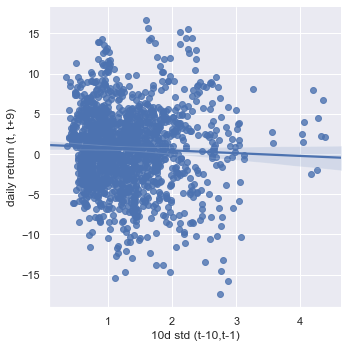

In [147]:
# calculate the std of 10 day returns
AAPL_Clean['AAPLstd10'] = AAPL_Clean['ret'].rolling(10).apply( lambda x: np.std(x) )

# shift the AAPL 10 day returns
# such that the shifted returns are 10 days ahead
AAPL_Clean['AAPLret10_shift'] = AAPL_Clean['AAPLret10'].shift(-10)

# plot the past 10 day return volatility against the next day return
sns.lmplot(x='AAPLstd10', y='ret', data=AAPL_Clean)
plt.xlabel('10d std (t-10,t)')
plt.ylabel('daily return (t)')
plt.title('Past Volatility and Future AAPL stock returns', size=14)
plt.show()

# plot the past 10 day return volatility against the next day return
sns.lmplot(x='AAPLstd10', y='ret_shift', data=AAPL_Clean)
plt.xlabel('10d std (t-10,t-1)')
plt.ylabel('daily return (t)')
plt.show()

# plot the past 10 day return volatility against the next 10 day return
sns.lmplot(x='AAPLstd10', y='AAPLret10_shift', data=AAPL_Clean)
plt.xlabel('10d std (t-10,t-1)')
plt.ylabel('daily return (t, t+9)')
plt.show()

Daily returns are more spread out when the stock volatility is higher. But there aren't any clear patterns between the past 10 day stock volatility and future stock returns.

#### 2.2 Is there any relationship between the volatility of AAPL returns and that of S&P500?

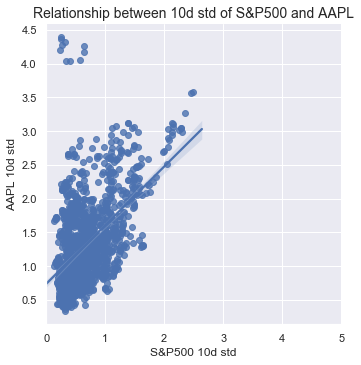

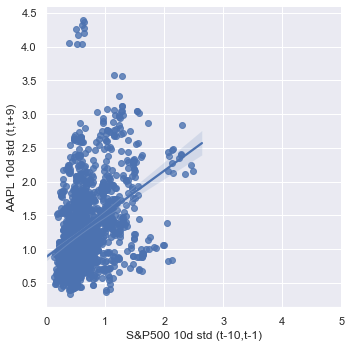

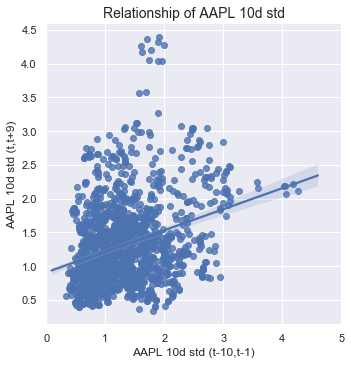

In [144]:
# shift the std of 10d AAPL returns by 10 periods
# such that the shifted std is 10 periods ahead
AAPL_Clean['AAPLstd10_shift'] = AAPL_Clean['AAPLstd10'].shift(10)

# calculate the std of S&P500 returns
AAPL_Clean['SPstd10'] = AAPL_Clean['sprtrn'].rolling(10).apply( lambda x: np.std(x) )

# plot AAPL return volatility against S&P500 return volatility
sns.lmplot(x='SPstd10', y='AAPLstd10', data=AAPL_Clean)
plt.xlabel('S&P500 10d std')
plt.ylabel('AAPL 10d std')
plt.title('Relationship between 10d std of S&P500 and AAPL', size=14)
plt.xlim(0, 5)
plt. show()

# plot future AAPL return volatility against past S&P500 return volatility
sns.lmplot(x='SPstd10', y='AAPLstd10_shift', data=AAPL_Clean)
plt.xlabel('S&P500 10d std (t-10,t-1)')
plt.ylabel('AAPL 10d std (t,t+9)')
plt.xlim(0, 5)
plt.show()

# plot future AAPL return volatility against past AAPL return volatility
sns.lmplot(x='AAPLstd10', y='AAPLstd10_shift', data=AAPL_Clean)
plt.xlabel('AAPL 10d std (t-10,t-1)')
plt.ylabel('AAPL 10d std (t,t+9)')
plt.title('Relationship of AAPL 10d std', size=14)
plt.xlim(0, 5);

The volatility of Apple stock returns is much higher than the S&P index, which is to be expected since Apple is a single stock while the index is a portfolio of stocks. When the S&P 500 index has periods of high volatility (such as in late 2015-16 and late 2018), the Apple returns seem to experience higher volatility as well. In general, high (near) past volatility seems to be somewhat associated with high (near) future volatility. 

### 3. Volume

#### 3.1 How does the daily stock volume change over time?

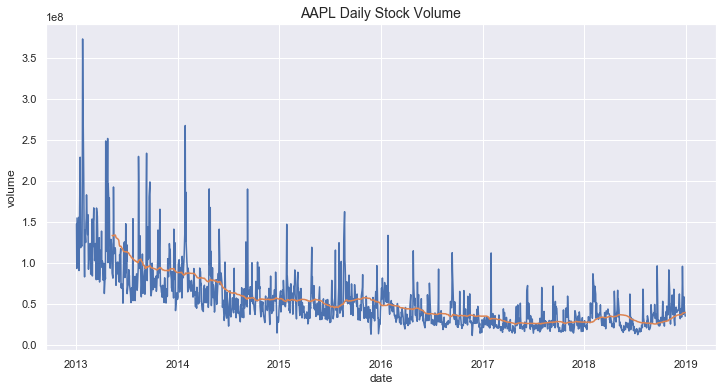

In [142]:
# plot the historical daily stock volume and its rolling mean
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['VOL'])
plt.plot(AAPL_Clean['VOL'].rolling(90).mean())
plt.xlabel('date')
plt.ylabel('volume')
plt.title('AAPL Daily Stock Volume', size=14);

The adjusted volume of AAPL stock decreased from 2013 to 2019. From the graph above, we can see that the stock volume somewhat levels out around mid 2014. It may be that with nominally less shares outstanding, a greater percentage were of outstanding shares were traded, leading the adjusted volume to be higher in the period before the stock split. This is consistent with the 7-1 stock split in June 2014. The overall stock market volume also declined over the sample period, reflecting a broader shift in trading activity.

#### 3.2 How are the daily changes in volume the distributed?

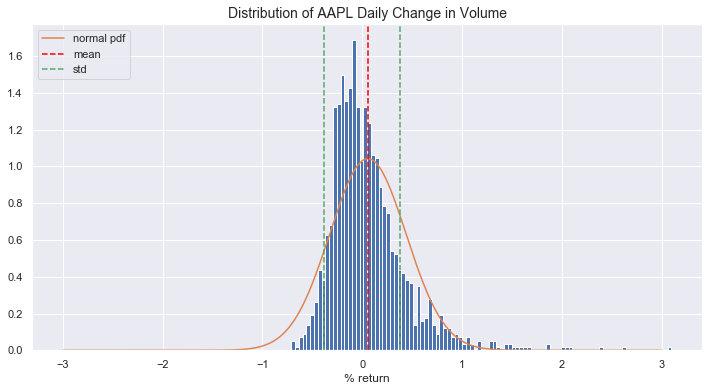

In [60]:
# calculate the daily change in volume
AAPL_Clean['volchange'] = (AAPL_Clean['VOL'].diff())/AAPL_Clean['VOL'].shift()

# calculate the mean and std for the histogram
mean = AAPL_Clean['volchange'].mean()
std = AAPL_Clean['volchange'].std()

# generate a pdf to overlay on the histogram
lnspc = np.linspace(-3, 3, len(AAPL_Clean['volchange']))
pdf_g = stats.norm.pdf(lnspc, mean, std) 

# plot histogram
plt.figure(figsize=(12,6))
plt.hist(AAPL_Clean['volchange'], bins=100, normed=True)
plt.plot(lnspc, pdf_g, label='normal pdf')
plt.axvline(mean,color='red',linestyle='dashed', label='mean')
plt.axvline(std,color='g',linestyle='dashed', label='std')
plt.axvline(-std,color='g',linestyle='dashed')
plt.xlabel('% return')
plt.title('Distribution of AAPL Daily Change in Volume', size=14)
plt.legend(loc='upper left');

The change in stock volume is heavily skewed towards the left, which makes sense since the it is declining over the sample period. There are large spikes in the positive direction, but not in the negative direction. 

#### 3.3 Is there any relationship between the change in volume and returns?

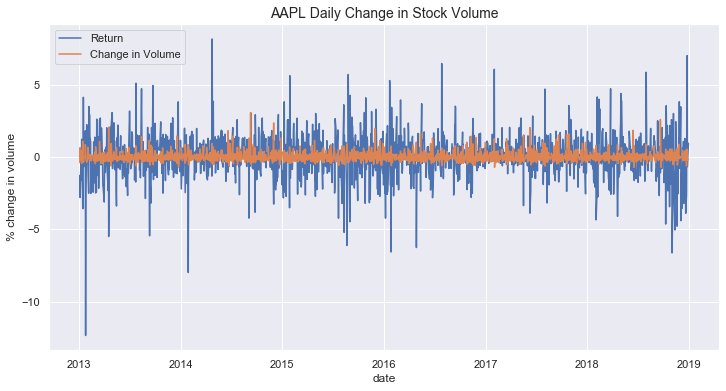

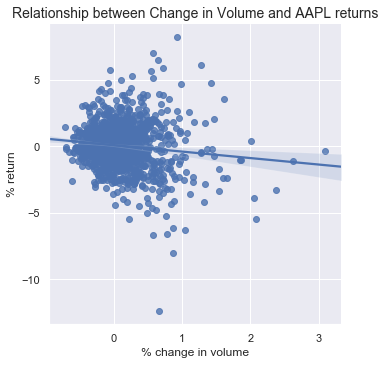

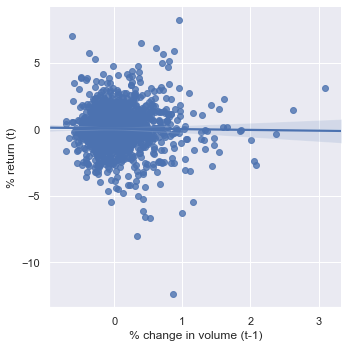

In [237]:
# plot the change in volume overlaid on AAPL returns
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['ret'], label='Return')
plt.plot(AAPL_Clean['volchange'], label='Change in Volume')
plt.xlabel('date')
plt.ylabel('% change in volume')
plt.title('AAPL Daily Change in Stock Volume', size=14)
plt.legend()
plt.show()

# plot the change in volume and AAPL returns
sns.lmplot(x='volchange', y='ret', data=AAPL_Clean)
plt.xlabel('% change in volume')
plt.ylabel('% return')
plt.title('Relationship between Change in Volume and AAPL returns', size=14)
plt.show()

# plot the change in volume and the next day AAPL returns
sns.lmplot(x='volchange', y='ret_shift', data=AAPL_Clean)
plt.xlabel('% change in volume (t-1)')
plt.ylabel('% return (t)');

Historical returns are more spread out when the same day change in volume is higher. This makes sense since greater trading activity can push the stock price much higher or lower. But there is no discernable pattern the previous period's change in volume and the next day return.

### 4. Number of Trades

#### 4.1 How does the daily number of trades change over time?

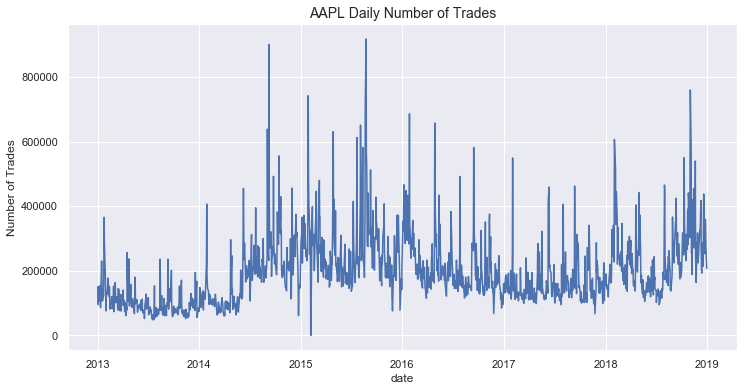

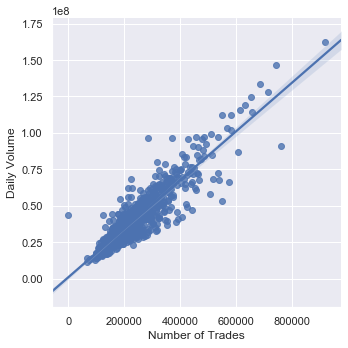

In [120]:
# plot the daily number of trades over time
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['NUMTRD'])
plt.xlabel('date')
plt.ylabel('Number of Trades')
plt.title('AAPL Daily Number of Trades', size=14)
plt.show()

# plot the volume and number of trades
sns.lmplot(x='NUMTRD', y='VOL', data=AAPL_Clean['2015':])
plt.xlabel('Number of Trades')
plt.ylabel('Daily Volume');

The number of trades suddenly rises in June 2014 after the 7-1 stock split. There is no good way to adjust the number of trades for the stock split. Thus, in the following graphs I use only a subsample of the data from years 2015-2018.

The number of trades is highly correlated with the volume, which makes sense.

#### 4.2 What is the relationship between the daily number of trades and stock return?

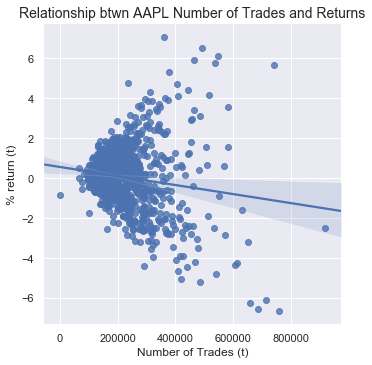

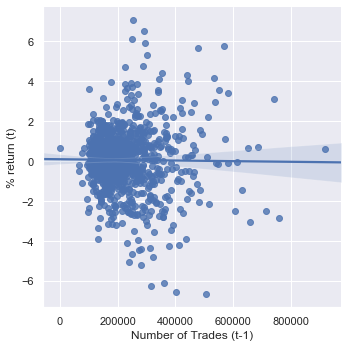

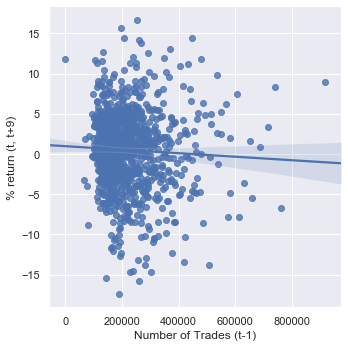

In [238]:
# plot the AAPL daily return against the number of trades
sns.lmplot(x='NUMTRD', y='ret', data=AAPL_Clean['2015':])
plt.xlabel('Number of Trades (t)')
plt.ylabel('% return (t)')
plt.title('Relationship btwn AAPL Number of Trades and Returns', size=14)
plt.show()

# plot the next day daily return against the number of trades
sns.lmplot(x='NUMTRD', y='ret_shift', data=AAPL_Clean['2015':])
plt.xlabel('Number of Trades (t-1)')
plt.ylabel('% return (t)')
plt.show()

# plot the next 10day return against the number of trades
sns.lmplot(x='NUMTRD', y='AAPLret10_shift', data=AAPL_Clean['2015':])
plt.xlabel('Number of Trades (t-1)')
plt.ylabel('% return (t, t+9)');

A higher number of trades is associated with more spread out same day returns and next day returns. But it doesn't have any discernable effect on the next 10 day returns.  

### 6. Earnings Announcements

#### 6.1 What effect does the earnings announcement have on stock returns?

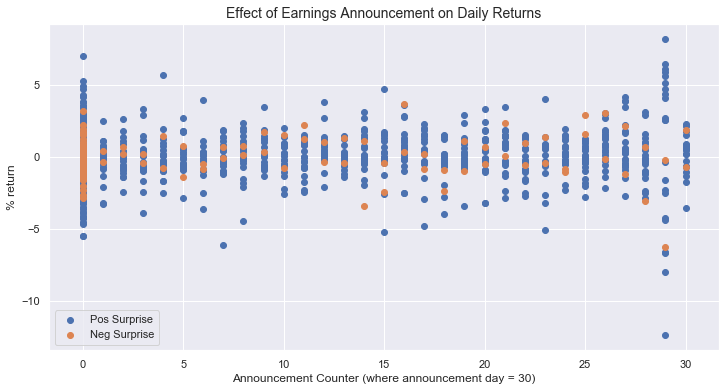

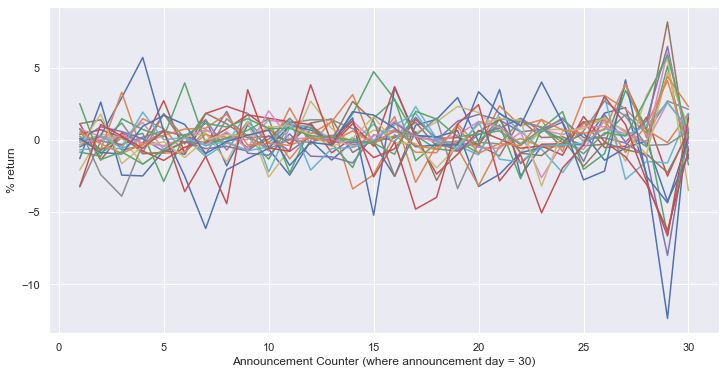

In [236]:
# plot the returns by the announcement counter (where announcement day=30)
plt.figure(figsize=(12,6))
AAPL_Clean['neg_surprise'] = np.where(AAPL_Clean['Surprise']<=0, 1, 0)
plt.scatter(AAPL_Clean[AAPL_Clean['neg_surprise']==0]['Announce'], AAPL_Clean[AAPL_Clean['neg_surprise']==0]['ret'],
           label='Pos Surprise')
plt.scatter(AAPL_Clean[AAPL_Clean['neg_surprise']==1]['Announce'], AAPL_Clean[AAPL_Clean['neg_surprise']==1]['ret'],
           label='Neg Surprise')
plt.xlabel('Announcement Counter (where announcement day = 30)')
plt.ylabel('% return')
plt.title('Effect of Earnings Announcement on Daily Returns', size=14)
plt.legend()
plt.show()

# plot the returns over time after each earnings announcement
plt.figure(figsize=(12,6))
earnings = AAPL_Clean[AAPL_Clean['Announce']!=0].reset_index()
for n in range(int(len(earnings)/30)):
    current = earnings[n*30:n*30+30]
    plt.plot(current['Announce'], current['ret'])
plt.xlabel('Announcement Counter (where announcement day = 30)')
plt.ylabel('% return');

The most extreme returns occur one day after the announcement day (at announcement = 29). When the surprise is zero or negative (2 historical cases), the second day return is negative. But the direction of the second day return is not dependent on surprise, since earnings announcements with positive surprise also have negative second day returns. 

#### 6.2 Is there post earnings announcement drift (PEAD)?

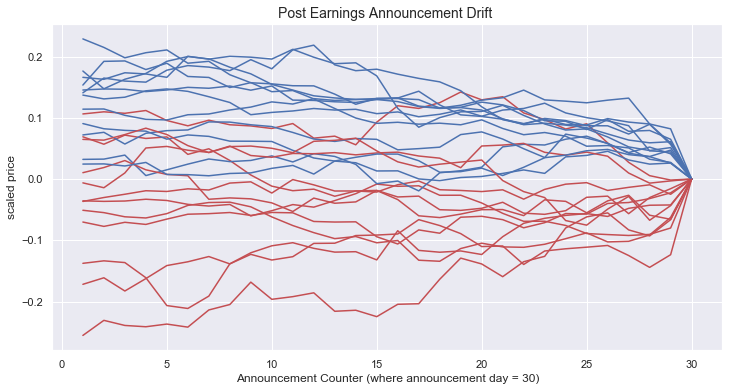

In [251]:
# plot the price over time after each earnings announcement
plt.figure(figsize=(12,6))
for n in range(int(len(earnings)/30)):
    current = earnings[n*30:n*30+30]
    # if the second day price decrease, set the color=red, else color=blue
    if current['ret'][n*30+1] <1:
        # scale price such that the announcement day price=0
        plt.plot(current['Announce'], current['PRC']/current['PRC'][n*30]-1, c='r') 
    else:
        plt.plot(current['Announce'], current['PRC']/current['PRC'][n*30]-1, c='b')
plt.xlabel('Announcement Counter (where announcement day = 30)')
plt.ylabel('scaled price')
plt.title('Post Earnings Announcement Drift ', size=14);

Historically, post earnings announcement prices have generally drifted in the same direction as the second day reaction. The periods with postive second day reactions follow the PEAD more than the periods with negative second day reactions. 

### 7. Google Trend

#### 7.1 How does Google trend interest change across the sample period?

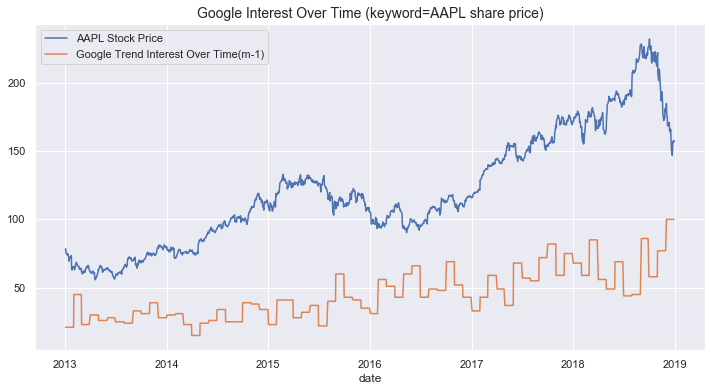

In [254]:
# plot google interest overlaid on the stock price over time
plt.figure(figsize=(12,6))
plt.plot(AAPL_Clean['PRC'], label='AAPL Stock Price')
plt.plot(AAPL_Clean['TREND'], label='Google Trend Interest Over Time(m-1)')
plt.xlabel('date')
plt.title('Google Interest Over Time (keyword=AAPL share price)',size=14)
plt.legend();

The Google trend interest over time increases across the sample period. One disadvantage of using Google trend is that long term historical data is only available with monthly frequency. So the Google trend shown at each point in time is the previous month's trend.  

#### 7.2 Is there any relationship between the previous month's Google trend and the stock price or return?

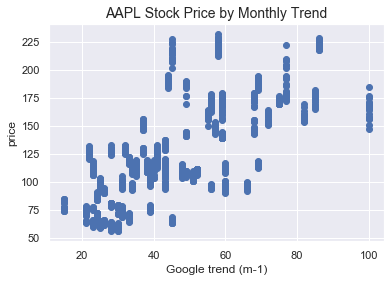

In [271]:
# plot stock price by trend
plt.figure(figsize=(6,4))
plt.scatter(AAPL_Clean['TREND'], AAPL_Clean['PRC'])
plt.xlabel('Google trend (m-1)')
plt.ylabel('price')
plt.title('AAPL Stock Price by Monthly Trend', size=14)
plt.show()

At first glance it might appear that Google trend and price are positively correlated. But since both AAPL's stock price and Google trend increased across the sample period, it is better to look at stock returns against the change in Google trend.

In [307]:
# calculate the change in Google trend
AAPL_Clean['TRENDchange'] = AAPL_Clean['TREND'].diff()
AAPL_Clean['TRENDchange'].replace(0, np.nan, inplace=True)
AAPL_Clean['TRENDchange'].fillna(method='ffill', inplace=True)

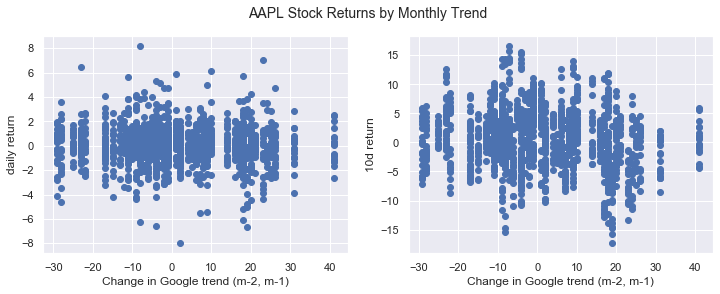

In [310]:
# plot daily returns and 10d returns against the change in Google trend
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(AAPL_Clean['TRENDchange'], AAPL_Clean['ret'])
plt.xlabel('Change in Google trend (m-2, m-1)')
plt.ylabel('daily return')

plt.subplot(1,2,2)
plt.scatter(AAPL_Clean['TRENDchange'], AAPL_Clean['AAPLret10'])
plt.xlabel('Change in Google trend (m-2, m-1)')
plt.ylabel('10d return')

plt.suptitle('AAPL Stock Returns by Monthly Trend', size=14);

No discernable patterns can be seen when plotting returns against the change in Google trend. 